In [0]:
# Quitar alertas
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2020-03-04 01:12:29--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-03-04 01:12:29--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-03-04 01:12:30--  https://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving versaweb.dl.so

In [0]:
#Procesamiento
import pandas as pd
from google.colab import files 
import io
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

#Modelos
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#Métricas
from sklearn.model_selection import GridSearchCV


In [0]:
def newtable(df,n):
  new=pd.DataFrame()
  new['PX_LAST']=df['PX_LAST'].groupby(df.index // n).last()
  new['PX_OPEN']=df['PX_OPEN'].groupby(df.index // n).first()
  new['PX_HIGH']=df['PX_HIGH'].groupby(df.index // n).max()
  new['PX_LOW']=df['PX_LOW'].groupby(df.index // n).min()
  new['ADX']=talib.ADX(new["PX_HIGH"],new["PX_LOW"],new["PX_LAST"],14)
  new['ADXR']=talib.ADXR(new["PX_HIGH"],new["PX_LOW"],new["PX_LAST"],14)
  new['APO']=talib.APO(new["PX_LAST"],12,26,0)
  new['AROONOSC']=talib.AROONOSC(new["PX_HIGH"],new["PX_LOW"],14)
  new['BOP']=talib.BOP(new["PX_OPEN"],new["PX_HIGH"],new["PX_LOW"],new["PX_LAST"])
  new['MOM']=talib.MOM(new["PX_LAST"],14)
  new['WILLR']=talib.WILLR(new["PX_HIGH"],new["PX_LOW"],new["PX_LAST"],14)
  new['CMO']=talib.CMO(new["PX_HIGH"],14)
  new['DX']=talib.DX(new["PX_HIGH"],new["PX_LOW"],new["PX_LAST"],14)
  new['MINUS_DI']=talib.MINUS_DI(new["PX_HIGH"],new["PX_LOW"],new["PX_LAST"],14)
  new['MINUS_DM']=talib.MINUS_DM(new["PX_HIGH"],new["PX_LOW"],14)
  new['PLUS_DI']=talib.PLUS_DI(new["PX_HIGH"],new["PX_LOW"],new["PX_LAST"],14)
  new['PLUS_DM']=talib.PLUS_DM(new["PX_HIGH"],new["PX_LOW"],14)
  new['PPO']=talib.PPO(new["PX_LAST"],12,26,0)
  new['TRIX']=talib.TRIX(new["PX_LAST"],30)
  new['ROCR']=talib.ROCR(new["PX_LAST"],10)
  new['CHANG']=new['PX_LAST'].diff()
  new['CHANG'] = new['CHANG'].shift(-1)
  # new['CHANG']= [0 if (a > -0.02 and a < 0.02) else 1 if a >= 0.02 else -1 for a in new['CHANG']]
  # new['CHANG']= [0 if (a > -0.02 and a < 0.02) else 1 if a >= 0.02 else -1 for a in new['CHANG']]
  # new['CHANG']= [-1 if a < 0 else 1 for a in new['CHANG']]
  new=new.dropna()
  return new

In [6]:
uploaded = files.upload()
df=pd.read_excel(io.BytesIO(uploaded["Base de Datos FX.xlsx"]))

Saving Base de Datos FX.xlsx to Base de Datos FX.xlsx


In [7]:
data=newtable(df,1)
data.head()

,PX_LAST,PX_OPEN,PX_HIGH,PX_LOW,ADX,ADXR,APO,AROONOSC,BOP,MOM,WILLR,CMO,DX,MINUS_DI,MINUS_DM,PLUS_DI,PLUS_DM,PPO,TRIX,ROCR,CHANG
88,6.401,6.295,6.407,6.291,33.145890,42.561962,0.111526,85.714286,0.913793,0.495,-0.977199,39.058495,24.714098,16.889881,0.255515,27.978761,0.423271,1.848959,-0.166523,1.068258,0.026
89,6.427,6.400,6.461,6.381,32.967977,42.091217,0.131423,92.857143,0.337500,0.577,-5.089820,44.048113,30.655109,15.979847,0.237264,30.108183,0.447037,2.174951,-0.157659,1.072239,0.078
90,6.505,6.403,6.520,6.396,33.223610,41.620839,0.156865,100.000000,0.822581,0.467,-2.572899,48.964741,36.546839,14.661232,0.220316,31.549964,0.474106,2.588587,-0.147727,1.086521,0.055
91,6.560,6.505,6.571,6.474,33.793182,41.350160,0.182647,71.428571,0.567010,0.501,-1.735016,52.823776,41.197623,13.708297,0.204580,32.916678,0.491241,3.003443,-0.136755,1.090244,-0.031
92,6.529,6.562,6.573,6.511,34.335032,41.184889,0.206122,78.571429,-0.532258,0.537,-6.918239,52.973949,41.379078,13.121250,0.189967,31.645190,0.458152,3.377406,-0.125152,1.065437,-0.109


In [8]:
data.describe()

,PX_LAST,PX_OPEN,PX_HIGH,PX_LOW,ADX,ADXR,APO,AROONOSC,BOP,MOM,WILLR,CMO,DX,MINUS_DI,MINUS_DM,PLUS_DI,PLUS_DM,PPO,TRIX,ROCR,CHANG
count,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000
mean,3.355544,3.356215,3.395451,3.317232,25.594073,25.597261,-0.005931,-6.901031,-0.017731,-0.012219,-52.424318,-3.262651,25.618397,22.660249,0.250178,21.252734,0.235870,-0.175494,-0.024380,0.999003,-0.000982
std,1.190432,1.190607,1.193213,1.188404,10.122488,9.055445,0.085115,66.022705,0.564831,0.200011,30.744473,26.257912,17.682109,7.293159,0.119754,7.442519,0.119604,2.871974,0.197046,0.057775,0.057613
min,1.357900,1.362900,1.393400,1.318000,8.138200,9.647658,-0.436657,-100.000000,-1.001934,-1.194000,-100.000000,-71.590874,0.017338,3.141195,0.032257,4.018098,0.041760,-13.396069,-0.802565,0.706674,-0.473600
25%,2.309900,2.307500,2.340800,2.276700,17.831432,18.703617,-0.061524,-64.285714,-0.532258,-0.141800,-80.870488,-22.826171,10.935835,17.483331,0.168251,15.766364,0.150157,-1.843666,-0.132581,0.964424,-0.035000
50%,3.269500,3.272100,3.323500,3.218900,23.757529,24.285664,-0.009378,-28.571429,0.000000,-0.018600,-54.039497,-3.814891,23.180332,22.293276,0.227561,20.516349,0.208713,-0.294912,-0.026587,0.994980,-0.000600
75%,4.331800,4.333900,4.376900,4.281000,31.352092,30.804987,0.049703,57.142857,0.492661,0.113200,-24.750831,15.718183,37.493285,27.373985,0.303742,26.057995,0.290285,1.543471,0.086307,1.030224,0.032300
max,6.560000,6.562000,6.573000,6.511000,62.651203,60.416605,0.291442,100.000000,1.030303,0.779000,-0.000000,77.102051,88.138458,53.576665,1.069755,54.486308,0.797023,12.096922,0.718678,1.325752,0.266800


In [9]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)
data_transformed=data
pd.DataFrame(data_transformed).head()

,PX_LAST,PX_OPEN,PX_HIGH,PX_LOW,ADX,ADXR,APO,AROONOSC,BOP,MOM,WILLR,CMO,DX,MINUS_DI,MINUS_DM,PLUS_DI,PLUS_DM,PPO,TRIX,ROCR,CHANG
88,6.401,6.295,6.407,6.291,33.145890,42.561962,0.111526,85.714286,0.913793,0.495,-0.977199,39.058495,24.714098,16.889881,0.255515,27.978761,0.423271,1.848959,-0.166523,1.068258,0.026
89,6.427,6.400,6.461,6.381,32.967977,42.091217,0.131423,92.857143,0.337500,0.577,-5.089820,44.048113,30.655109,15.979847,0.237264,30.108183,0.447037,2.174951,-0.157659,1.072239,0.078
90,6.505,6.403,6.520,6.396,33.223610,41.620839,0.156865,100.000000,0.822581,0.467,-2.572899,48.964741,36.546839,14.661232,0.220316,31.549964,0.474106,2.588587,-0.147727,1.086521,0.055
91,6.560,6.505,6.571,6.474,33.793182,41.350160,0.182647,71.428571,0.567010,0.501,-1.735016,52.823776,41.197623,13.708297,0.204580,32.916678,0.491241,3.003443,-0.136755,1.090244,-0.031
92,6.529,6.562,6.573,6.511,34.335032,41.184889,0.206122,78.571429,-0.532258,0.537,-6.918239,52.973949,41.379078,13.121250,0.189967,31.645190,0.458152,3.377406,-0.125152,1.065437,-0.109


In [10]:
pd.DataFrame(data_transformed).describe()

,PX_LAST,PX_OPEN,PX_HIGH,PX_LOW,ADX,ADXR,APO,AROONOSC,BOP,MOM,WILLR,CMO,DX,MINUS_DI,MINUS_DM,PLUS_DI,PLUS_DM,PPO,TRIX,ROCR,CHANG
count,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000
mean,3.355544,3.356215,3.395451,3.317232,25.594073,25.597261,-0.005931,-6.901031,-0.017731,-0.012219,-52.424318,-3.262651,25.618397,22.660249,0.250178,21.252734,0.235870,-0.175494,-0.024380,0.999003,-0.000982
std,1.190432,1.190607,1.193213,1.188404,10.122488,9.055445,0.085115,66.022705,0.564831,0.200011,30.744473,26.257912,17.682109,7.293159,0.119754,7.442519,0.119604,2.871974,0.197046,0.057775,0.057613
min,1.357900,1.362900,1.393400,1.318000,8.138200,9.647658,-0.436657,-100.000000,-1.001934,-1.194000,-100.000000,-71.590874,0.017338,3.141195,0.032257,4.018098,0.041760,-13.396069,-0.802565,0.706674,-0.473600
25%,2.309900,2.307500,2.340800,2.276700,17.831432,18.703617,-0.061524,-64.285714,-0.532258,-0.141800,-80.870488,-22.826171,10.935835,17.483331,0.168251,15.766364,0.150157,-1.843666,-0.132581,0.964424,-0.035000
50%,3.269500,3.272100,3.323500,3.218900,23.757529,24.285664,-0.009378,-28.571429,0.000000,-0.018600,-54.039497,-3.814891,23.180332,22.293276,0.227561,20.516349,0.208713,-0.294912,-0.026587,0.994980,-0.000600
75%,4.331800,4.333900,4.376900,4.281000,31.352092,30.804987,0.049703,57.142857,0.492661,0.113200,-24.750831,15.718183,37.493285,27.373985,0.303742,26.057995,0.290285,1.543471,0.086307,1.030224,0.032300
max,6.560000,6.562000,6.573000,6.511000,62.651203,60.416605,0.291442,100.000000,1.030303,0.779000,-0.000000,77.102051,88.138458,53.576665,1.069755,54.486308,0.797023,12.096922,0.718678,1.325752,0.266800


In [0]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

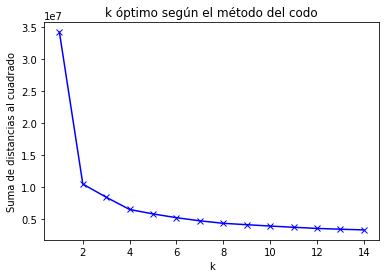

In [12]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Suma de distancias al cuadrado')
plt.title('k óptimo según el método del codo')
plt.show()

In [0]:
optimo=2

Según el método del codo, el número óptimo de cluster son 2

In [0]:
#Reducción de dimensionalidad
X=np.array(data_transformed)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [0]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(principalDf)
distances, indices = nbrs.kneighbors(principalDf)

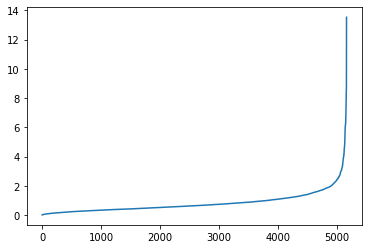

In [16]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Epsilon óptimo: 2

In [0]:
epsi=20

Text(0.5, 1.0, 'DBSCAN')

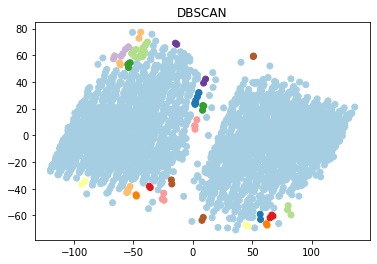

In [18]:
clustering = DBSCAN(eps=5, min_samples=optimo).fit(principalDf)
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],c=clustering.labels_, cmap='Paired')
plt.title("DBSCAN")

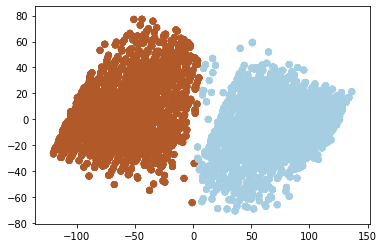

In [19]:
for i in range(5):
  kmeans = KMeans(n_clusters=2, random_state=42).fit(principalDf)
  plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],c=kmeans.labels_, cmap='Paired')